In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

# EDA of Datasets
Here we will be using a regression model to execute exploratory data analysis of two datasets of top Spotify songs for the year 2017 and 2018. Plot polynomial Regression lines and calculate PCC

First we will read in the dataset from our files

In [2]:
dataset_2017 = pd.read_csv('./data/top-tracks-of-2017.csv', delimiter=',')
dataset_2018 = pd.read_csv('./data/top-tracks-of-2018.csv', delimiter=',')

The dataset for 2017

In [3]:
dataset_2017.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


The dataset for 2018


In [4]:
dataset_2018.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


The datasets have songs ordered by popularity. Using this we will 

In [5]:
def createTarget(dataset):
    target = np.arange(1, dataset.shape[0] + 1)
    target = pd.Series(target)
    return target
    
def addTargetCol(target, dataset):
    full_dataset = dataset
    full_dataset.insert(dataset.shape[1], "popularity", target)
    return full_dataset


target_dataset_2017 = createTarget(dataset_2017)
target_dataset_2018 = createTarget(dataset_2018)

revised_dataset_2017 = addTargetCol(target_dataset_2017, dataset_2017)
revised_dataset_2018 = addTargetCol(target_dataset_2017, dataset_2018)

Plotting the variables vs target for 2017 dataset

(104.96376011773361, -3.963760117733628)

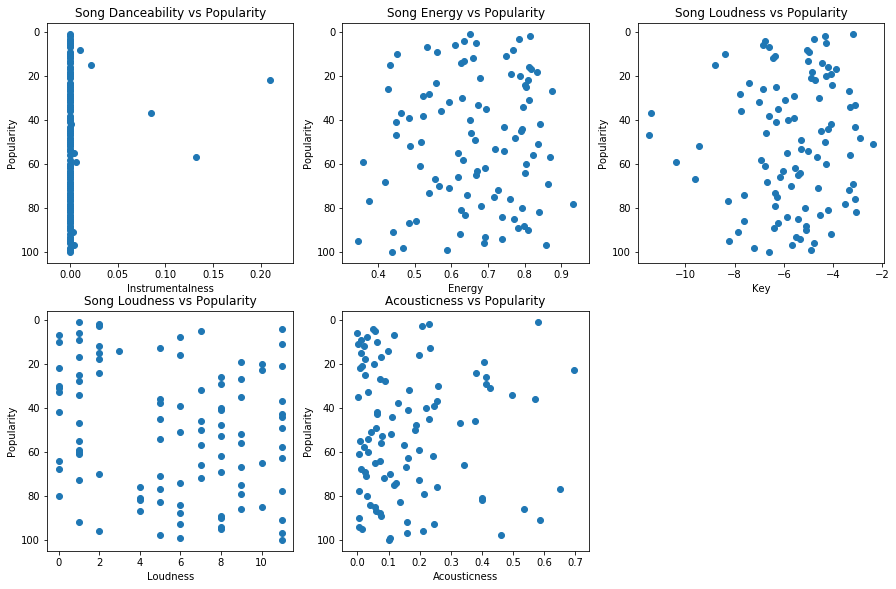

In [31]:
fig2 = plt.figure(figsize=(15, 15))
ax1 = fig2.add_subplot(331)
ax1.set_xlabel("Instrumentalness")
ax1.set_ylabel("Popularity")
ax1.set_title("Song Danceability vs Popularity")
ax1.scatter(revised_dataset_2017.instrumentalness, revised_dataset_2017.popularity)
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = fig2.add_subplot(332)
ax2.set_xlabel("Energy")
ax2.set_ylabel("Popularity")
ax2.set_title("Song Energy vs Popularity")
ax2.scatter(revised_dataset_2017.energy, revised_dataset_2017.popularity)
ax2.set_ylim(ax2.get_ylim()[::-1])

ax3 = fig2.add_subplot(333)
ax3.set_xlabel("Key")
ax3.set_ylabel("Popularity")
ax3.set_title("Song Loudness vs Popularity")
ax3.scatter(revised_dataset_2017.loudness, revised_dataset_2017.popularity)
ax3.set_ylim(ax3.get_ylim()[::-1])

ax4 = fig2.add_subplot(334)
ax4.set_xlabel("Loudness")
ax4.set_ylabel("Popularity")
ax4.set_title("Song Loudness vs Popularity")
ax4.scatter(revised_dataset_2017.key, revised_dataset_2017.popularity)
ax4.set_ylim(ax4.get_ylim()[::-1])

ax5 = fig2.add_subplot(335)
ax5.set_xlabel("Acousticness")
ax5.set_ylabel("Popularity")
ax5.set_title("Acousticness vs Popularity")
ax5.scatter(revised_dataset_2017.acousticness, revised_dataset_2017.popularity)
ax5.set_ylim(ax5.get_ylim()[::-1])

27.624292217325195
0.08418659404959705


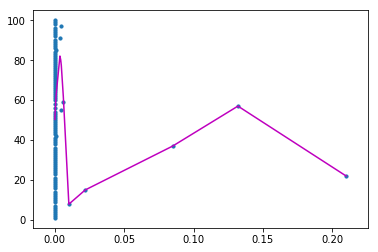

In [28]:
x = revised_dataset_2017.instrumentalness
y = revised_dataset_2017.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

26.935124096324582
0.12931183908262223


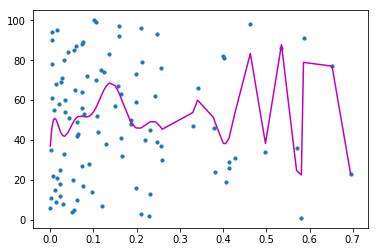

In [32]:
x = revised_dataset_2017.acousticness
y = revised_dataset_2017.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [7]:
dataset_big = pd.read_csv('./data/top10s2010-2019_rankadded_utf8.csv', delimiter=',')
dataset_big.describe()

,index,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730,33.457711
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746,21.672267
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000,1.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000,16.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000,31.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000,49.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000,95.000000


(99.71376011773363, -3.713760117733628)

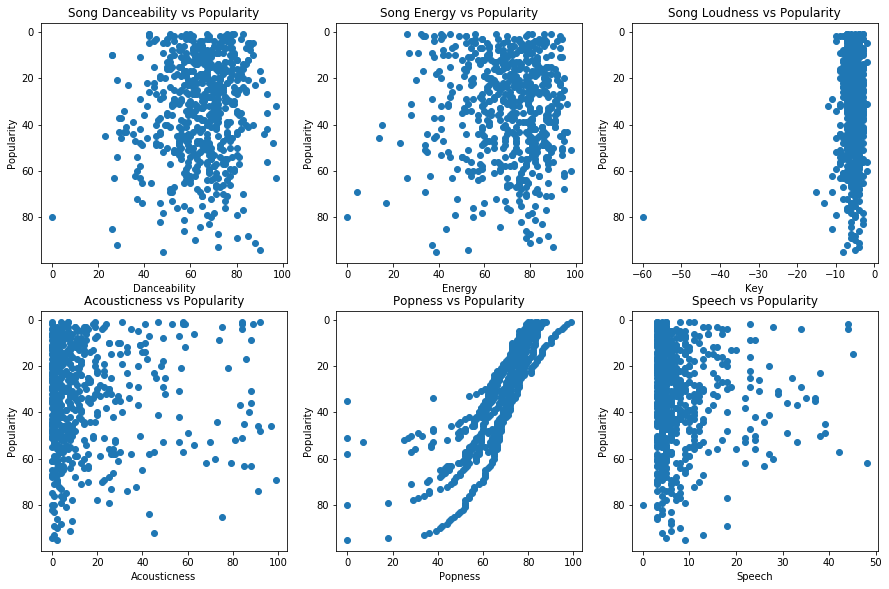

In [8]:
fig2 = plt.figure(figsize=(15, 15))
ax1 = fig2.add_subplot(331)
ax1.set_xlabel("Danceability")
ax1.set_ylabel("Popularity")
ax1.set_title("Song Danceability vs Popularity")
ax1.scatter(dataset_big.dnce, dataset_big.popularity)
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = fig2.add_subplot(332)
ax2.set_xlabel("Energy")
ax2.set_ylabel("Popularity")
ax2.set_title("Song Energy vs Popularity")
ax2.scatter(dataset_big.nrgy, dataset_big.popularity)
ax2.set_ylim(ax2.get_ylim()[::-1])

ax3 = fig2.add_subplot(333)
ax3.set_xlabel("Key")
ax3.set_ylabel("Popularity")
ax3.set_title("Song Loudness vs Popularity")
ax3.scatter(dataset_big.dB, dataset_big.popularity)
ax3.set_ylim(ax3.get_ylim()[::-1])

ax4 = fig2.add_subplot(334)
ax4.set_xlabel("Acousticness")
ax4.set_ylabel("Popularity")
ax4.set_title("Acousticness vs Popularity")
ax4.scatter(dataset_big.acous, dataset_big.popularity)
ax4.set_ylim(ax4.get_ylim()[::-1])

ax5 = fig2.add_subplot(335)
ax5.set_xlabel("Popness")
ax5.set_ylabel("Popularity")
ax5.set_title("Popness vs Popularity")
ax5.scatter(dataset_big.popness, dataset_big.popularity)
ax5.set_ylim(ax5.get_ylim()[::-1])

ax6 = fig2.add_subplot(336)
ax6.set_xlabel("Speech")
ax6.set_ylabel("Popularity")
ax6.set_title("Speech vs Popularity")
ax6.scatter(dataset_big.spch, dataset_big.popularity)
ax6.set_ylim(ax6.get_ylim()[::-1])

21.468269636779677
0.017107064625389135


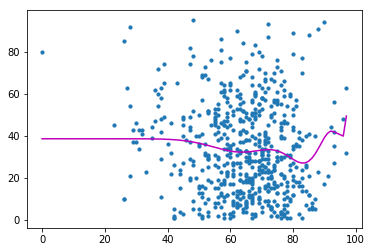

In [9]:
#Polynomial Regression of degree 20 on Dance vs Popularity

x = dataset_big.dnce
y = dataset_big.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

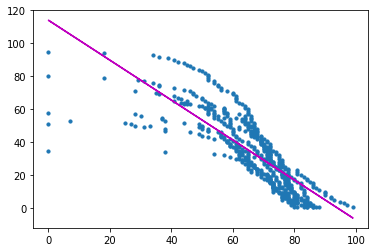

In [10]:
#Linear Regresion on Popness vs Popularity 

x = dataset_big.popness
y = dataset_big.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='m')
plt.show()

10.066773512742476
0.7838811109191306


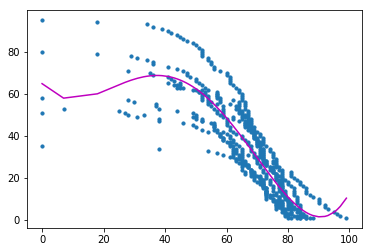

In [11]:
#Degree 4 Polynomial Regression for Popness vs Popularity 

x = dataset_big.popness
y = dataset_big.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

21.408553593340617
0.022567480957762842


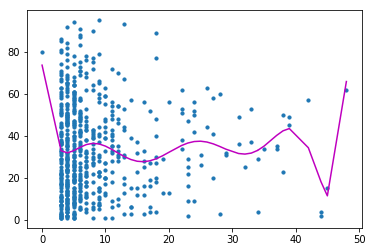

In [12]:
#Polynomial Regression of degree 9 between Speech vs Popularity 

x = dataset_big.spch
y = dataset_big.popularity

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [13]:
def getCorrelation(dataset):
    import pandas as pd
    corr = dataset.corr('pearson')['popularity']
    corr_sq = corr.pow(2)
    corr = pd.DataFrame({"variables": list(dataset.columns),
                         "corr_score": corr.to_numpy(),
                         "corr_sq": corr_sq.to_numpy()})
    corr = corr.sort_values(by=['corr_sq'], ascending=False)

    return pd.DataFrame({"variables": corr['variables'].to_numpy(),
                         "corr_score": corr['corr_score'].to_numpy()})
dataset_reduced = dataset_big.drop(['index', 'name', 'artists'], axis=1)
print(getCorrelation(dataset_reduced))
dataset_reduced.insert(0, 'bias', 1)
print(dataset_reduced)

     variables  corr_score
0   popularity    1.000000
1      popness   -0.811603
2           dB   -0.104431
3         dnce   -0.103781
4          val   -0.087897
5         year    0.085778
6          bpm   -0.050231
7         live    0.048122
8         nrgy    0.029952
9          dur    0.026405
10       acous   -0.007290
11        spch    0.006188
     bias  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  popness  \
0       1  2010   97    89    67  -4     8   80  217     19     4       83   
1       1  2010   87    93    75  -5    52   64  263     24    23       82   
2       1  2010  120    84    76  -3    29   71  200     10    14       80   
3       1  2010  119    92    70  -4     8   71  295      0     4       79   
4       1  2010  109    84    64  -5     9   43  221      2     4       78   
..    ...   ...  ...   ...   ...  ..   ...  ...  ...    ...   ...      ...   
598     1  2019  104    66    61  -7    20   16  176      1     3       75   
599     1  2019   95    7

In [14]:
from sklearn.model_selection import train_test_split
X = dataset_reduced.drop(['popularity', 'acous', 'spch'], axis=1)
y = dataset_reduced.popularity
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34543)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Weights: ", reg.coef_)
y_pred = reg.predict(X_test)
print("y_test shape: ", y_test.shape)
print("y_pred shape: ", y_pred.shape)

from sklearn.metrics import mean_squared_error

print("RMSE: ", mean_squared_error(y_test, y_pred))

     bias  year  bpm  nrgy  dnce  dB  live  val  dur  popness
0       1  2010   97    89    67  -4     8   80  217       83
1       1  2010   87    93    75  -5    52   64  263       82
2       1  2010  120    84    76  -3    29   71  200       80
3       1  2010  119    92    70  -4     8   71  295       79
4       1  2010  109    84    64  -5     9   43  221       78
..    ...   ...  ...   ...   ...  ..   ...  ...  ...      ...
598     1  2019  104    66    61  -7    20   16  176       75
599     1  2019   95    79    75  -6     7   61  206       75
600     1  2019  136    76    53  -5     9   65  260       70
601     1  2019  114    79    60  -6    42   24  217       69
602     1  2019  150    44    70  -9    13   23  213       67

[603 rows x 10 columns]
0       1
1       2
2       3
3       4
4       5
       ..
598    27
599    28
600    29
601    30
602    31
Name: popularity, Length: 603, dtype: int64
Weights:  [ 0.          2.52174759 -0.0333731   0.05465303 -0.04370405 -0.116